In [2]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 3s 1us/step


/Users/pengsongning/dp_ml/env/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/pengsongning/dp_ml/env/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [17]:
import math
#min(test_labels) #0
#max(test_labels) #45
#labels介於0~45之間

45

In [20]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))#64單元隱藏層（輸入層 -> 需要input_shape）
model.add(layers.Dense(64,activation='relu'))#64單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(46,activation='softmax')) #因為labels介於0~45之間,所以要46個output

softmax : 它能將一個含任意實數的K維向量 Z「壓縮」到另一個 K維實向量 f(Z)中，使得每一個元素的範圍都在(0,1)之間，
並且所有元素的和為1(也可視為一個 (k-1)維的hyperplan，因為總和為1，所以是subspace)

In [27]:
model.compile(optimizer='rmsprop', #無論任何問,rmsprop都是不錯的選擇
             loss='categorical_crossentropy',#一般來說，如果上一是用softmax的話，都會使用categorical_crossentropy
             metrics=['accuracy'])

In [31]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [32]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size = 512,
                   validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 71ms/step - loss: 2.8287 - accuracy: 0.5152 - val_loss: 1.8650 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 40ms/step - loss: 1.4941 - accuracy: 0.6963 - val_loss: 1.3430 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 36ms/step - loss: 1.0873 - accuracy: 0.7676 - val_loss: 1.1806 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8489 - accuracy: 0.8247 - val_loss: 1.0579 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 1s 35ms/step - loss: 0.6734 - accuracy: 0.8649 - val_loss: 1.0304 - val_accuracy: 0.7700
Epoch 6/20
16/16 [==============================] - 1s 34ms/step - loss: 0.5433 - accuracy: 0.8893 - val_loss: 0.9211 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.4309 - accuracy: 0.9098 - val_loss: 0.8919 - val_accuracy: 0.8050
Epoch 8/20
16

In [33]:
history_dict = history.history

In [39]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

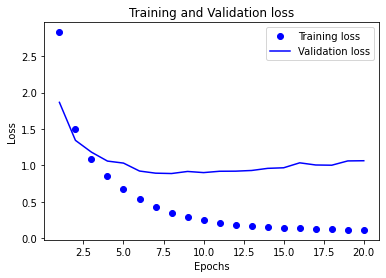

In [35]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']

epochs = range(1,len(loss_values)+1) 
plt.plot(epochs,loss_values,'bo',label='Training loss')# x是週期,y是loss_values
plt.plot(epochs,val_loss_value,'b',label='Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

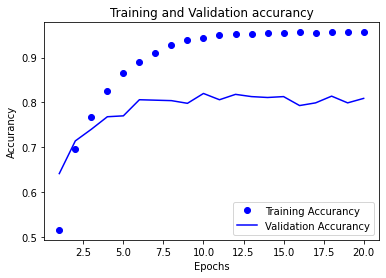

In [41]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs,acc,'bo',label = 'Training Accurancy')
plt.plot(epochs,val_acc,'b',label = 'Validation Accurancy')

plt.title('Training and Validation accurancy')
plt.xlabel('Epochs')
plt.ylabel('Accurancy')
plt.legend()

plt.show()

- 大概在第八週期開始loss不下降，所以重新訓練

In [82]:
##可以在這裡坐增加隱藏層or增加神經元or改變韓式的測試
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))#64單元隱藏層（輸入層 -> 需要input_shape）
model.add(layers.Dense(64,activation='relu'))#64單元隱藏層 input_shape會自動設定成上一層的輸出shape
model.add(layers.Dense(46,activation='softmax')) #因為labels介於0~45之間,所以要46個output

model.compile(optimizer='rmsprop', #無論任何問,rmsprop都是不錯的選擇
             #loss='categorical_crossentropy',#一般來說，如果上一是用softmax的話，都會使用categorical_crossentropy
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size = 512,
          validation_data=(x_val,y_val))

results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 49ms/step - loss: 0.0772 - accuracy: 0.4287 - val_loss: 0.0536 - val_accuracy: 0.6180
Epoch 2/9
16/16 [==============================] - 1s 40ms/step - loss: 0.0444 - accuracy: 0.6953 - val_loss: 0.0411 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 1s 38ms/step - loss: 0.0341 - accuracy: 0.7600 - val_loss: 0.0367 - val_accuracy: 0.7430
Epoch 4/9
16/16 [==============================] - 1s 45ms/step - loss: 0.0278 - accuracy: 0.8117 - val_loss: 0.0343 - val_accuracy: 0.7630
Epoch 5/9
16/16 [==============================] - 1s 38ms/step - loss: 0.0232 - accuracy: 0.8462 - val_loss: 0.0325 - val_accuracy: 0.7850
Epoch 6/9
16/16 [==============================] - 1s 38ms/step - loss: 0.0194 - accuracy: 0.8700 - val_loss: 0.0314 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 1s 38ms/step - loss: 0.0162 - accuracy: 0.8924 - val_loss: 0.0307 - val_accuracy: 0.8040
Epoch 8/9
16/16 [===

In [83]:
results

[0.032625917345285416, 0.7813891172409058]